In [1]:
import warnings
warnings.filterwarnings("ignore")


In [2]:
!pip install tensorflow==2.15.0

In [3]:
import tensorflow as tf
print(tf.__version__)

2024-05-18 01:22:08.166038: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-18 01:22:08.166086: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-18 01:22:08.167484: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


2.15.0


In [4]:
!pip install tensorflow-addons==0.21.0

In [5]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
import os
import pandas as pd, numpy as np, random, shutil
import tensorflow as tf, re, math
import tensorflow.keras.backend as K
import sklearn
import matplotlib.pyplot as plt
import tensorflow_probability as tfp
import wandb
import yaml

from IPython import display as ipd
from glob import glob
from tqdm import tqdm
from sklearn.model_selection import KFold, StratifiedKFold, GroupKFold, StratifiedGroupKFold
from sklearn.metrics import roc_auc_score
from sklearn.utils.class_weight import compute_class_weight

import numpy as np
import pandas as pd
from PIL import Image
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.utils import class_weight
from sklearn.preprocessing import minmax_scale
import random
import cv2
from imgaug import augmenters as iaa
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Activation, Input, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.experimental import CosineDecay
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.layers.experimental.preprocessing import RandomCrop,CenterCrop, RandomRotation

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings

In [7]:
np.random.seed(10)

train_df = pd.read_csv('/kaggle/input/rsna-breast-cancer-detection/train.csv')

test_df = pd.read_csv('/kaggle/input/rsna-breast-cancer-detection/test.csv')


base_path='/kaggle/input/rsna-mammography-images-as-pngs/images_as_pngs_cv2_256/'

# saving image path into train dataframe
train_df['img_path']= f'{base_path}/train_images_processed_cv2_256'\
                    + '/' + train_df.patient_id.astype(str)\
                    + '/' + train_df.image_id.astype(str)\
                    + '.png'



display(train_df.head(3))


,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,img_path
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False,/kaggle/input/rsna-mammography-images-as-pngs/...
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False,/kaggle/input/rsna-mammography-images-as-pngs/...
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False,/kaggle/input/rsna-mammography-images-as-pngs/...


cancer
0    53548
1     1158
Name: count, dtype: int64


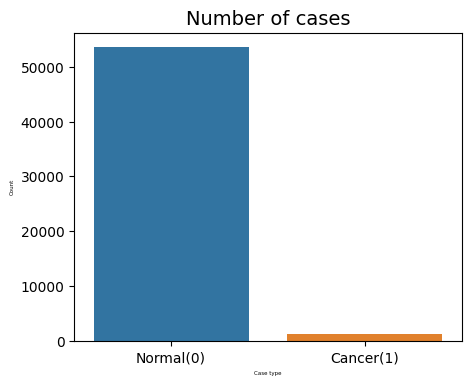

In [8]:
# Get the counts for each class
cases_count = train_df['cancer'].value_counts()
print(cases_count)

# Plot the results 
plt.figure(figsize=(5,4))
sns.barplot(x=cases_count.index, y= cases_count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=4)
plt.ylabel('Count', fontsize=4)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Cancer(1)'])
plt.show()

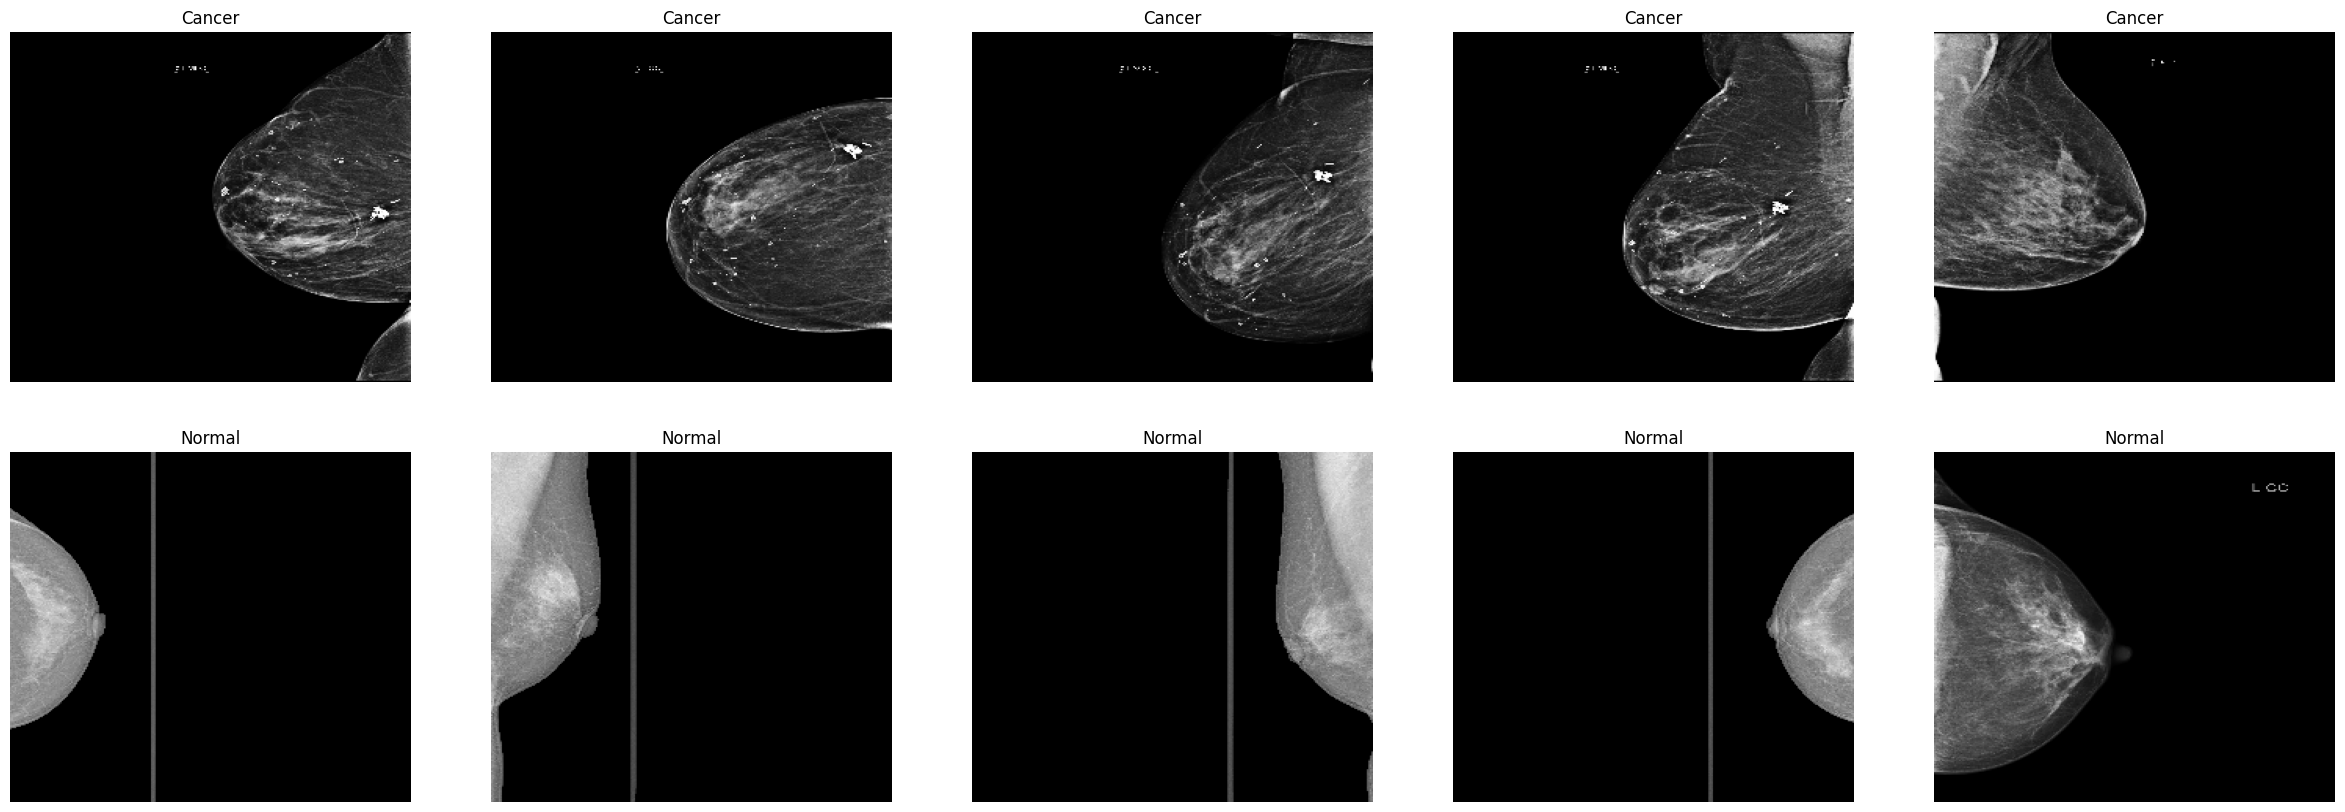

In [9]:
Cancer_samples = (train_df[train_df['cancer']==1]['img_path'].iloc[0:5]).tolist()
Normal_samples = (train_df[train_df['cancer']==0]['img_path'].iloc[0:5]).tolist()
# Concat the data in a single list and del the above two list
samples = Cancer_samples + Normal_samples
# source = "../input/melanoma-merged-external-data-512x512-jpeg/512x512-dataset-melanoma/512x512-dataset-melanoma/"
# Plot the data 
f, ax = plt.subplots(2,5, figsize=(30,10))
for i in range(10):
    img = tf.keras.preprocessing.image.load_img(samples[i])
    ax[i//5, i%5].imshow(img, cmap='gray')
    if i<5:
        ax[i//5, i%5].set_title("Cancer")
    else:
        ax[i//5, i%5].set_title("Normal")
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')
plt.show()

In [10]:
data_augmentation_layers = tf.keras.Sequential(
    [
        layers.experimental.preprocessing.RandomCrop(height=256, width=256),
        layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        layers.experimental.preprocessing.RandomRotation(0.25),
        layers.experimental.preprocessing.RandomZoom((-0.2, 0)),
        layers.experimental.preprocessing.RandomContrast((0.2,0.2)),
])

(1, 256, 256, 3)
augmented_image  (1, 256, 256, 3)
augmented_image  (1, 256, 256, 3)
augmented_image  (1, 256, 256, 3)
augmented_image  (1, 256, 256, 3)
augmented_image  (1, 256, 256, 3)
augmented_image  (1, 256, 256, 3)


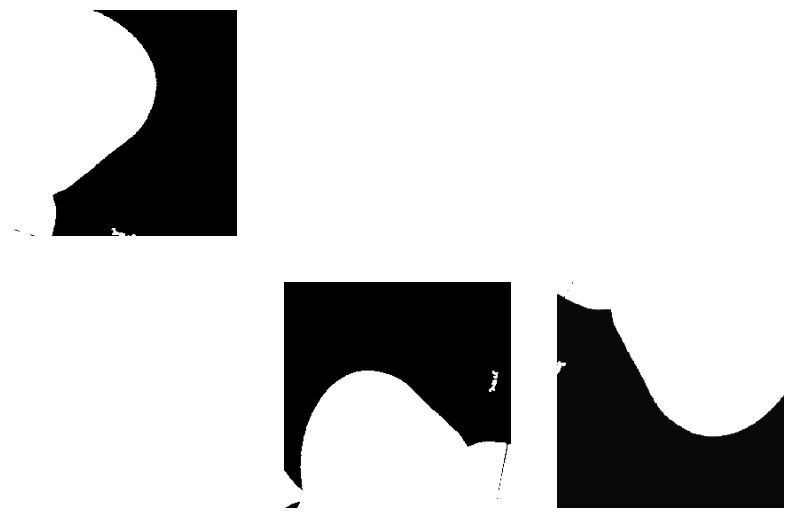

In [11]:
image = tf.keras.preprocessing.image.load_img(train_df['img_path'][90])


image = tf.expand_dims(np.array(image), 0)

print(image.shape)

plt.figure(figsize=(10, 10))
for i in range(6):
  augmented_image = data_augmentation_layers(image)
  print('augmented_image ',augmented_image.shape)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

In [12]:
from imgaug import augmenters as iaa



class DataGenerator(tf.keras.utils.Sequence):
    def __init__(self, df, path, batch_size=32, shuffle=True,aug=True,labels=True):
        self.df = df.copy()
        if 'prediction_id' not in df:
            self.df['prediction_id'] = df["patient_id"].astype(str) + '_' + df["laterality"].astype(str)

        self.prediction_ids = self.df['prediction_id'].unique()
        self.labels = labels
        if self.labels ==True:
            self.labels = self.df.groupby('prediction_id')['cancer'].max()
        self.path = path
        self.batch_size = batch_size
        self.aug=aug
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        """Denotes the number of batches per epoch"""
        return int(len(self.prediction_ids) / self.batch_size)

    def __getitem__(self, index):
        """Generate one batch of data"""
        batch_indexes = self.prediction_ids[index * self.batch_size:(index + 1) * self.batch_size]
        X, y = self.__data_generation(batch_indexes)
        return X, y

    def __get_input(self, path):
        
#         print('path   ',path)
        image = tf.keras.preprocessing.image.load_img(path)
        image_arr = tf.keras.preprocessing.image.img_to_array(image)
        
        if self.aug:
            
             image_arr=self.augmentor(image_arr)

        
        return image_arr

    
    def augmentor(self, images):
        'Apply data augmentation'
        images=data_augmentation_layers(images)

        return images
    
    
    def on_epoch_end(self):
        """Updates indexes after each epoch"""
        if self.shuffle:
            self.df = self.df.sample(frac=1).reset_index(drop=True)

    def __data_generation(self, batch_indexes):
        paths = self.get_paths_images(batch_indexes)
        X = np.asarray([self.__get_input(path) for path in paths])
        y = np.array([self.labels[batch_indexes]])
        return X, y

    def get_paths_images(self, batch_indexes):
        batch = self.df[self.df['prediction_id'].isin(batch_indexes)]
        rows_batch = self.get_rows(batch)
        return self.path + rows_batch["patient_id"].astype(str) + "/" + rows_batch["image_id"].astype(
            str) + ".png"

    def get_rows(self, batch):
        """Select only 1 MLO view picture per breast"""
        only_MLO_view_images = batch[batch['view'] == 'MLO']
        only_one_per_prediction_id = only_MLO_view_images.groupby('prediction_id')[['patient_id', 'image_id']].max()
        return only_one_per_prediction_id

In [13]:
import numpy as np
import pandas as pd

np.random.seed(0)

batch_size=8
epochs=2
img_path='/kaggle/input/rsna-mammography-images-as-pngs/images_as_pngs_cv2_256/train_images_processed_cv2_256/'

def get_train_val_generator(train_size=0.8, batch_size=batch_size, filename=train_df, image_dir=img_path):

    patient_ids = train_df["patient_id"].unique()
    np.random.shuffle(patient_ids)
    train_size = int(len(patient_ids) * train_size)
    train_ids = patient_ids[:train_size]
    val_ids = patient_ids[train_size:]

    df_train = train_df[train_df['patient_id'].isin(train_ids)]
    df_val = train_df[train_df['patient_id'].isin(val_ids)]

    train_gen = DataGenerator(df_train, batch_size=batch_size, path=image_dir,aug=True)
    val_gen = DataGenerator(df_val, batch_size=batch_size, path=image_dir,aug=False)
    
    return train_gen, val_gen

dataset_path=train_df
image_dir=img_path
train_gen, val_gen = get_train_val_generator(filename=dataset_path, image_dir=image_dir)

In [14]:
base_model = VGG16(input_shape = (256, 256, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

In [15]:
base_model.trainable=False

In [16]:
model1 = base_model.output

model1 = tf.keras.layers.Dense(512,activation='relu')(model1)
model1 = tf.keras.layers.GlobalAveragePooling2D()(model1)
model1 = tf.keras.layers.Dropout(rate=0.5)(model1)
model1 = tf.keras.layers.Dense(1,activation='sigmoid')(model1)
model1 = tf.keras.models.Model(inputs=base_model.input, outputs = model1)

In [17]:
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [18]:
tensorboard1 = TensorBoard(log_dir = 'logs')
checkpoint1 = ModelCheckpoint("vgg16",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
reduce_lr1 = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.4, patience = 2, min_delta = 0.0001,
                              mode='auto',verbose=1)

In [19]:
model1.compile(optimizer="Adam",loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
history = model1.fit(train_gen, validation_data=val_gen, epochs=5,callbacks=[tensorboard1,checkpoint1,reduce_lr1])

Epoch 1/5


I0000 00:00:1715995357.796465     400 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2382/2382 [==============================] - ETA: 0s - loss: 0.1274 - accuracy: 0.9787
Epoch 1: val_accuracy improved from -inf to 0.97752, saving model to vgg16
2382/2382 [==============================] - 1088s 454ms/step - loss: 0.1274 - accuracy: 0.9787 - val_loss: 0.1218 - val_accuracy: 0.9775 - lr: 0.0010
Epoch 2/5
2382/2382 [==============================] - ETA: 0s - loss: 0.1082 - accuracy: 0.9798
Epoch 2: val_accuracy did not improve from 0.97752
2382/2382 [==============================] - 956s 401ms/step - loss: 0.1082 - accuracy: 0.9798 - val_loss: 0.1176 - val_accuracy: 0.9775 - lr: 0.0010
Epoch 3/5
2382/2382 [==============================] - ETA: 0s - loss: 0.1071 - accuracy: 0.9798
Epoch 3: val_accuracy did not improve from 0.97752

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.
2382/2382 [==============================] - 950s 399ms/step - loss: 0.1071 - accuracy: 0.9798 - val_loss: 0.1274 - val_accuracy: 0.9775 - lr: 0.0010
Epoch 4/5
2382

In [21]:
# Test Images

DATASET_PATH='/kaggle/input/rsna-breast-cancer-detection/'
test_df = pd.read_csv(os.path.join(DATASET_PATH, "test.csv"))
# display(test_df.head())
# print(f'cases: {len(test_df)}')

In [22]:
def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels = 3)
    img = tf.image.resize(img, [256, 256])
    img = tf.cast(img, dtype = tf.float32)
    img = img/255.0
    return img

# test_paths=[]
# test_dir='/kaggle/input/rsnatest/test_images_256/10008/'
# img_path= os.listdir (test_dir)



DF_PATH = '/kaggle/input/rsna-breast-cancer-detection'
df = pd.read_csv("/kaggle/input/rsna-breast-cancer-detection/test.csv")

test_path='/kaggle/input/rsnatest/test_images_256/'

test_dir = f'{test_path}'




test_df['img_path']= f'{test_dir}/'\
                    + '/' + test_df.patient_id.astype(str)\
                    + '/' + test_df.image_id.astype(str)\
                    + '.png'


test_df
# image = tf.keras.preprocessing.image.load_img(test_df['img_path'][1])
        
# plt.imshow(image)
# plt.show()

,site_id,patient_id,image_id,laterality,view,age,implant,machine_id,prediction_id,img_path
0,2,10008,736471439,L,MLO,81,0,21,10008_L,/kaggle/input/rsnatest/test_images_256///10008...
1,2,10008,1591370361,L,CC,81,0,21,10008_L,/kaggle/input/rsnatest/test_images_256///10008...
2,2,10008,68070693,R,MLO,81,0,21,10008_R,/kaggle/input/rsnatest/test_images_256///10008...
3,2,10008,361203119,R,CC,81,0,21,10008_R,/kaggle/input/rsnatest/test_images_256///10008...


In [37]:
preds=[]
for i in range (len(test_df['img_path'])):
    
    image = tf.keras.preprocessing.image.load_img(test_df['img_path'][i])

    image=tf.expand_dims(np.array(image), 0)
    pred=model1.predict(np.asarray(image))
    
    preds.append(pred)

1/1 [==============================] - 0s 31ms/step


In [41]:
pred_df = pd.DataFrame({'prediction_id':test_df.prediction_id,
                        'cancer':preds})

pred_df['cancer']=(pred_df.cancer > 0.5).astype(int)

In [42]:
print(test_df.columns)
print(pred_df.columns)

Index(['site_id', 'patient_id', 'image_id', 'laterality', 'view', 'age',
       'implant', 'machine_id', 'prediction_id', 'img_path'],
      dtype='object')
Index(['prediction_id', 'cancer'], dtype='object')


In [43]:
# Function to calculate probabilistic F1 score
def pfbeta(labels, predictions, beta):
    y_true_count = 0  # Count of true positive labels
    ctp = 0  # Cumulative true positives based on predictions
    cfp = 0  # Cumulative false positives based on predictions

    for idx in range(len(labels)):
        # Clip predictions to be between 0 and 1
        prediction = min(max(predictions[idx], 0), 1)
        
        if labels[idx]:
            y_true_count += 1
            ctp += prediction  # Add to cumulative true positives
        else:
            cfp += prediction  # Add to cumulative false positives

    beta_squared = beta * beta
    # Calculate precision and recall
    if y_true_count > 0:  # Check if y_true_count is greater than zero
        c_precision = ctp / (ctp + cfp)
        c_recall = ctp / y_true_count

        if c_precision > 0 and c_recall > 0:
            # Calculate the F1 score with the given beta
            result = (1 + beta_squared) * (c_precision * c_recall) / (beta_squared * c_precision + c_recall)
            return result
    return 0 
preds = []
for i in range(len(test_df['img_path'])):
    img = tf.keras.preprocessing.image.load_img(test_df['img_path'][i], target_size=(256, 256))  # Adjust target_size if needed
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    
    pred = model1.predict(img_array)
    preds.append(pred[0][0]) 

predictions = np.array(preds)

labels = pred_df['cancer'].values 

beta = 1.0

# Calculate the probabilistic F1 score
pf1_score = pfbeta(labels, predictions, beta)

print(f"Probabilistic F1 Score: {pf1_score}")


1/1 [==============================] - 0s 31ms/step
Probabilistic F1 Score: 0


In [44]:
labels_imgs = list(test_df.patient_id.astype(str) + '_' + test_df.laterality.astype(str))

print('Probabilistic F1 score:'+ str(pfbeta(labels_imgs, y_pred, 1)))

Probabilistic F1 score:0.6666666666666666
